<a href="https://colab.research.google.com/github/Sara1428/Deep-RL-for-Optimizing-Stock-Returns/blob/main/q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [4]:
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # Start at the top-left corner
        self.goal = (size - 1, size - 1)  # Goal at the bottom-right corner
        self.obstacles = [(1, 1), (1, 3), (3, 1)]  # Define obstacles
        self.reset()

    def reset(self):
        self.state = (0, 0)
        return self.state
    def step(self, action):
        x, y = self.state
        if action == 0:
            x = max(0, x - 1)
        elif action == 1:
            x = min(self.size - 1, x + 1)
        elif action == 2:
            y = max(0, y - 1)
        elif action == 3:
            y = min(self.size - 1, y + 1)

        if (x, y) in self.obstacles:
            x, y = self.state

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal

        return self.state, reward, done

    def available_actions(self):
        return [0, 1, 2, 3]


In [5]:
# Q-learning parameters
num_episodes = 500
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 1.0
exploration_decay = 0.99
min_exploration_rate = 0.01

# Initialize Q-table
q_table = np.zeros((5, 5, 4))  # Size of grid x Size of grid x Number of actions

# Initialize environment
env = GridWorld()

In [6]:
# Training loop
rewards = []
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for step in range(100):
        x, y = state

        if random.uniform(0, 1) < exploration_rate:
            action = random.choice(env.available_actions())
        else:
            action = np.argmax(q_table[x, y])

        next_state, reward, done = env.step(action)
        total_reward += reward

        x_next, y_next = next_state
        q_table[x, y, action] += learning_rate * (
            reward + discount_factor * np.max(q_table[x_next, y_next]) - q_table[x, y, action]
        )

        state = next_state
        if done:
            break

    rewards.append(total_reward)
    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)


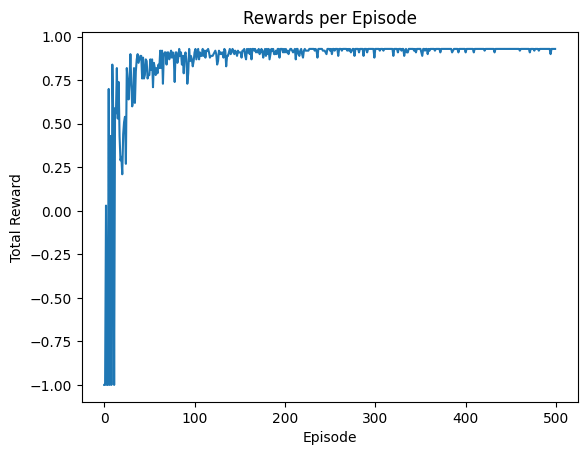

In [7]:
# Plotting results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode')
plt.show()